In [1]:
import cobra

In [2]:
cobra_config = cobra.Configuration()

In [3]:
cobra_config.lower_bound

-1000.0

In [4]:
cobra_config.bounds

(-1000.0, 1000.0)

In [5]:
cobra_config.bounds = -10,20

In [6]:
cobra_config.bounds

(-10, 20)

In [7]:
cobra.Reaction("R1")

Reaction identifier,R1
Name,
Memory address,0x02a50f70f220
Stoichiometry,--> -->
GPR,
Lower bound,0.0
Upper bound,20


In [8]:
cobra.Reaction("R2")

Reaction identifier,R2
Name,
Memory address,0x02a50f70f670
Stoichiometry,--> -->
GPR,
Lower bound,0.0
Upper bound,20


In [11]:
cobra_config

Attribute,Description,Value
solver,Mathematical optimization solver,glpk
tolerance,"General solver tolerance (feasibility, integrality, etc.)",1e-07
lower_bound,Default reaction lower bound,-10
upper_bound,Default reaction upper bound,20
processes,Number of parallel processes,11
cache_directory,Path for the model cache,C:\Users\koush\AppData\Local\opencobra\cobrapy\Cache
max_cache_size,Maximum cache size in bytes,104857600
cache_expiration,Model cache expiration time in seconds (if any),None


In [12]:
cobra

<module 'cobra' from 'C:\\Users\\koush\\anaconda3\\envs\\FBA\\lib\\site-packages\\cobra\\__init__.py'>

In [13]:
cobra.Reaction("R2", lower_bound = None)

Reaction identifier,R2
Name,
Memory address,0x02a50f70f8b0
Stoichiometry,<=> <=>
GPR,
Lower bound,-10
Upper bound,20


In [26]:
from cobra.test import create_test_model

In [27]:
model = create_test_model("textbook")

In [32]:
model

Name,e_coli_core
Memory address,0x02223d2131f0
Number of metabolites,72
Number of reactions,95
Number of groups,0
Objective expression,1.0*Biomass_Ecoli_core - 1.0*Biomass_Ecoli_core_reverse_2cdba
Compartments,"cytosol, extracellular"


In [33]:
cobra

<module 'cobra' from 'C:\\Users\\koush\\anaconda3\\envs\\FBA\\lib\\site-packages\\cobra\\__init__.py'>

In [30]:
cobra.Reaction("ACt2r",lower_bound = 0)

Reaction identifier,ACt2r
Name,
Memory address,0x02223d51db50
Stoichiometry,--> -->
GPR,
Lower bound,0
Upper bound,1000.0


In [36]:
model.reactions.ACt2r.lower_bound = -1000

In [37]:
model.reactions.ACt2r

Reaction identifier,ACt2r
Name,R acetate reversible transport via proton - symport
Memory address,0x02223d47f910
Stoichiometry,ac_e + h_e <=> ac_c + h_c Acetate + H+ <=> Acetate + H+
GPR,
Lower bound,-1000
Upper bound,1000.0


In [17]:
model.reactions

[<Reaction ACALD at 0x2a50f78aac0>,
 <Reaction ACALDt at 0x2a50f78aaf0>,
 <Reaction ACKr at 0x2a50f78adf0>,
 <Reaction ACONTa at 0x2a50f78ae50>,
 <Reaction ACONTb at 0x2a50f78ad60>,
 <Reaction ACt2r at 0x2a50f78aa90>,
 <Reaction ADK1 at 0x2a50f78aee0>,
 <Reaction AKGDH at 0x2a50f78ab80>,
 <Reaction AKGt2r at 0x2a50f7988e0>,
 <Reaction ALCD2x at 0x2a50f798f40>,
 <Reaction ATPM at 0x2a50f798d90>,
 <Reaction ATPS4r at 0x2a50f78ad30>,
 <Reaction Biomass_Ecoli_core at 0x2a50f78ad90>,
 <Reaction CO2t at 0x2a50f7b3670>,
 <Reaction CS at 0x2a50f798850>,
 <Reaction CYTBD at 0x2a50f7b3220>,
 <Reaction D_LACt2 at 0x2a50f7a8c70>,
 <Reaction ENO at 0x2a50f798b20>,
 <Reaction ETOHt2r at 0x2a50f798d60>,
 <Reaction EX_ac_e at 0x2a50f7b31f0>,
 <Reaction EX_acald_e at 0x2a50f7bdb20>,
 <Reaction EX_akg_e at 0x2a50f7a8880>,
 <Reaction EX_co2_e at 0x2a50f7bdd00>,
 <Reaction EX_etoh_e at 0x2a50f7a8640>,
 <Reaction EX_for_e at 0x2a50f7bde50>,
 <Reaction EX_fru_e at 0x2a50f78aca0>,
 <Reaction EX_fum_e at 0x2a

In [19]:
model.solver

In [22]:
cobra_config.solver = "glpk_exact"

In [24]:
new_model = create_test_model("textbook")

In [25]:
new_model.solver

In [27]:
cobra_config.solver="glpk"
model2 = create_test_model("textbook")
model2.solver

In [30]:
from cobra import Model,Reaction,Metabolite
model = Model('new_model')
reaction = Reaction('R_3OAS140')
reaction.name = '3 oxoacyl acyl carrier protein synthase n C140'
reaction.subsystem = 'Cell Envelope Biosynthesis'
reaction.lower_bound = 0
reaction.upper_bound = 1000

In [31]:
model

Name,new_model
Memory address,0x02a50fa7a4c0
Number of metabolites,0
Number of reactions,0
Number of groups,0
Objective expression,0
Compartments,


In [32]:
reaction

Reaction identifier,R_3OAS140
Name,3 oxoacyl acyl carrier protein synthase n C140
Memory address,0x02a50fa5da30
Stoichiometry,--> -->
GPR,
Lower bound,0
Upper bound,1000


In [34]:
ACP_c = Metabolite(
    'ACP_c',
    formula='C11H21N2O7PRS',
    name='acyl-carrier-protein',
    compartment='c')
omrsACP_c = Metabolite(
    'M3omrsACP_c',
    formula='C25H45N2O9PRS',
    name='3-Oxotetradecanoyl-acyl-carrier-protein',
    compartment='c')
co2_c = Metabolite('co2_c', formula='CO2', name='CO2', compartment='c')
malACP_c = Metabolite(
    'malACP_c',
    formula='C14H22N2O10PRS',
    name='Malonyl-acyl-carrier-protein',
    compartment='c')
h_c = Metabolite('h_c', formula='H', name='H', compartment='c')
ddcaACP_c = Metabolite(
    'ddcaACP_c',
    formula='C23H43N2O8PRS',
    name='Dodecanoyl-ACP-n-C120ACP',
    compartment='c')

In [35]:
reaction.add_metabolites({
    malACP_c: -1.0,
    h_c: -1.0,
    ddcaACP_c: -1.0,
    co2_c: 1.0,
    ACP_c: 1.0,
    omrsACP_c: 1.0
})

reaction.reaction  # This gives a string representation of the reaction

'ddcaACP_c + h_c + malACP_c --> ACP_c + M3omrsACP_c + co2_c'

In [36]:
reaction.gene_reaction_rule = '(STM2378 or STM1197)'
reaction.genes

frozenset({<Gene STM1197 at 0x2a50fa85070>, <Gene STM2378 at 0x2a50fa85550>})

In [38]:
print(f'{len(model.reactions)} reactions initially')
print(f'{len(model.metabolites)} metabolites initially')
print(f'{len(model.genes)} genes initially')

0 reactions initially
0 metabolites initially
0 genes initially


In [40]:
model.add_reactions([reaction])

print(f'{len(model.reactions)} reactions initially')
print(f'{len(model.metabolites)} metabolites initially')
print(f'{len(model.genes)} genes initially')

1 reactions initially
6 metabolites initially
2 genes initially


In [41]:
# Iterate through the objects in the model
print("Reactions")
print("---------")
for x in model.reactions:
    print("%s : %s" % (x.id, x.reaction))

print("")
print("Metabolites")
print("-----------")
for x in model.metabolites:
    print('%9s : %s' % (x.id, x.formula))

print("")
print("Genes")
print("-----")
for x in model.genes:
    associated_ids = (i.id for i in x.reactions)
    print("%s is associated with reactions: %s" %
          (x.id, "{" + ", ".join(associated_ids) + "}"))

Reactions
---------
R_3OAS140 : ddcaACP_c + h_c + malACP_c --> ACP_c + M3omrsACP_c + co2_c

Metabolites
-----------
 malACP_c : C14H22N2O10PRS
      h_c : H
ddcaACP_c : C23H43N2O8PRS
    co2_c : CO2
    ACP_c : C11H21N2O7PRS
M3omrsACP_c : C25H45N2O9PRS

Genes
-----
STM2378 is associated with reactions: {R_3OAS140}
STM1197 is associated with reactions: {R_3OAS140}


In [43]:
model.objective = 'R_3OAS140'
print(model.objective.expression)
print(model.objective.direction)

1.0*R_3OAS140 - 1.0*R_3OAS140_reverse_60acb
max


In [44]:
import tempfile
from pprint import pprint
from cobra.io import write_sbml_model, validate_sbml_model
with tempfile.NamedTemporaryFile(suffix='.xml') as f_sbml:
    write_sbml_model(model, filename=f_sbml.name)
    report = validate_sbml_model(filename=f_sbml.name)

pprint(report)

(None,
 {'COBRA_CHECK': [],
  'COBRA_ERROR': ['No SBML model detected in file.'],
  'COBRA_FATAL': [],
  'COBRA_WARNING': [],
  'SBML_ERROR': ['E0 (Error): Operating system (core, L1); File unreadable; '
                 'File unreadable. '
                 'C:\\Users\\koush\\AppData\\Local\\Temp\\tmpjn87pmq0.xml\n'],
  'SBML_FATAL': [],
  'SBML_SCHEMA_ERROR': [],
  'SBML_WARNING': []})


In [45]:
print("exchanges",model.exchanges)
print("demands",model.demands)
print("sinks",model.sinks)

There are no boundary reactions in this model. Therefore specific types of boundary reactions such as 'exchanges', 'demands' or 'sinks' cannot be identified.


exchanges []


There are no boundary reactions in this model. Therefore specific types of boundary reactions such as 'exchanges', 'demands' or 'sinks' cannot be identified.


demands []


There are no boundary reactions in this model. Therefore specific types of boundary reactions such as 'exchanges', 'demands' or 'sinks' cannot be identified.


sinks []


In [46]:
model.add_metabolites([    
    Metabolite(
    'glycogen_c',
    name='glycogen',
    compartment='c'
    ),
    Metabolite(
    'co2_e',
    name='CO2',
    compartment='e'
    ),
])
model.add_boundary(model.metabolites.get_by_id("co2_e"), type="exchange")

Reaction identifier,EX_co2_e
Name,CO2 exchange
Memory address,0x02a50f992fa0
Stoichiometry,co2_e <=> CO2 <=>
GPR,
Lower bound,-10
Upper bound,20


In [47]:
# create exchange reaction
model.add_boundary(model.metabolites.get_by_id("glycogen_c"), type="sink")

Reaction identifier,SK_glycogen_c
Name,glycogen sink
Memory address,0x02a50fa7af70
Stoichiometry,glycogen_c <=> glycogen <=>
GPR,
Lower bound,-10
Upper bound,20


In [48]:
print("exchanges", model.exchanges)
print("sinks", model.sinks)
print("demands", model.demands)


exchanges [<Reaction EX_co2_e at 0x2a50f992fa0>]
sinks [<Reaction SK_glycogen_c at 0x2a50fa7af70>]
demands []


In [49]:
model.reactions

[<Reaction R_3OAS140 at 0x2a50fa5da30>,
 <Reaction EX_co2_e at 0x2a50f992fa0>,
 <Reaction SK_glycogen_c at 0x2a50fa7af70>]

In [50]:
model.boundary

[<Reaction EX_co2_e at 0x2a50f992fa0>,
 <Reaction SK_glycogen_c at 0x2a50fa7af70>]

In [51]:
# metabolic reactions
set(model.reactions) - set(model.boundary)

{<Reaction R_3OAS140 at 0x2a50fa5da30>}

In [52]:
import cobra.test
import os
from os.path import join

data_dir = cobra.test.data_dir

print("mini test files: ")
print(", ".join(i for i in os.listdir(data_dir) if i.startswith("mini")))

textbook_model = cobra.test.create_test_model("textbook")
ecoli_model = cobra.test.create_test_model("ecoli")
salmonella_model = cobra.test.create_test_model("salmonella")

mini test files: 
mini.json, mini.mat, mini.pickle, mini.yml, mini_cobra.xml, mini_fbc1.xml, mini_fbc2.xml, mini_fbc2.xml.bz2, mini_fbc2.xml.gz


In [53]:
cobra.io.read_sbml_model(join(data_dir,"mini_fbc2.xml"))

Name,mini_textbook
Memory address,0x02a50fa85100
Number of metabolites,23
Number of reactions,18
Number of groups,0
Objective expression,1.0*ATPM - 1.0*ATPM_reverse_5b752 + 1.0*PFK - 1.0*PFK_reverse_d24a6
Compartments,"cytosol, extracellular"


In [54]:
cobra.io.write_sbml_model(textbook_model,"text_fbc2.xml")

In [55]:
cobra.io.load_json_model(join(data_dir, "mini.json"))
cobra.io.save_json_model(textbook_model, "test.json")

In [1]:
from cobra.test import create_test_model
model = create_test_model("textbook")

In [2]:
solution = model.optimize()
print(solution)

<Solution 0.874 at 0x22236c142e0>


In [3]:
solution.status

'optimal'

In [4]:
solution.objective_value

0.8739215069684307

In [5]:
solution.fluxes

ACALD     0.000000
ACALDt    0.000000
ACKr      0.000000
ACONTa    6.007250
ACONTb    6.007250
            ...   
TALA      1.496984
THD2      0.000000
TKT1      1.496984
TKT2      1.181498
TPI       7.477382
Name: fluxes, Length: 95, dtype: float64

In [9]:
%%time
model.optimize().objective_value

Wall time: 7.97 ms


0.8739215069684304

In [7]:
%%time
model.slim_optimize()

Wall time: 0 ns


0.8739215069684307

In [10]:
model.summary()

Metabolite,Reaction,Flux,C-Number,C-Flux
glc__D_e,EX_glc__D_e,10,6,100.00%
nh4_e,EX_nh4_e,4.765,0,0.00%
o2_e,EX_o2_e,21.8,0,0.00%
pi_e,EX_pi_e,3.215,0,0.00%
Metabolite,Reaction,Flux,C-Number,C-Flux
co2_e,EX_co2_e,-22.81,1,100.00%
h2o_e,EX_h2o_e,-29.18,0,0.00%
h_e,EX_h_e,-17.53,0,0.00%


In [11]:
model.metabolites.nadh_c.summary()

Percent,Flux,Reaction,Definition
13.14%,5.064,AKGDH,akg_c + coa_c + nad_c --> co2_c + nadh_c + succoa_c
8.04%,3.1,Biomass_Ecoli_core,1.496 3pg_c + 3.7478 accoa_c + 59.81 atp_c + 0.361 e4p_c + 0.0709 f6p_c + 0.129 g3p_c + 0.205 g6p_c + 0.2557 gln__L_c + 4.9414 glu__L_c + 59.81 h2o_c + 3.547 nad_c + 13.0279 nadph_c + 1.7867 oaa_c + 0.5191 pep_c + 2.8328 pyr_c + 0.8977 r5p_c --> 59.81 adp_c + 4.1182 akg_c + 3.7478 coa_c + 59.81 h_c + 3.547 nadh_c + 13.0279 nadp_c + 59.81 pi_c
41.58%,16.02,GAPD,g3p_c + nad_c + pi_c <=> 13dpg_c + h_c + nadh_c
13.14%,5.064,MDH,mal__L_c + nad_c <=> h_c + nadh_c + oaa_c
24.09%,9.283,PDH,coa_c + nad_c + pyr_c --> accoa_c + co2_c + nadh_c
Percent,Flux,Reaction,Definition
100.00%,-38.53,NADH16,4.0 h_c + nadh_c + q8_c --> 3.0 h_e + nad_c + q8h2_c


In [12]:
model.metabolites.atp_c.summary()

Percent,Flux,Reaction,Definition
66.58%,45.51,ATPS4r,adp_c + 4.0 h_e + pi_c <=> atp_c + h2o_c + 3.0 h_c
23.44%,16.02,PGK,3pg_c + atp_c <=> 13dpg_c + adp_c
2.57%,1.758,PYK,adp_c + h_c + pep_c --> atp_c + pyr_c
7.41%,5.064,SUCOAS,atp_c + coa_c + succ_c <=> adp_c + pi_c + succoa_c
Percent,Flux,Reaction,Definition
12.27%,-8.39,ATPM,atp_c + h2o_c --> adp_c + h_c + pi_c
76.46%,-52.27,Biomass_Ecoli_core,1.496 3pg_c + 3.7478 accoa_c + 59.81 atp_c + 0.361 e4p_c + 0.0709 f6p_c + 0.129 g3p_c + 0.205 g6p_c + 0.2557 gln__L_c + 4.9414 glu__L_c + 59.81 h2o_c + 3.547 nad_c + 13.0279 nadph_c + 1.7867 oaa_c + 0.5191 pep_c + 2.8328 pyr_c + 0.8977 r5p_c --> 59.81 adp_c + 4.1182 akg_c + 3.7478 coa_c + 59.81 h_c + 3.547 nadh_c + 13.0279 nadp_c + 59.81 pi_c
0.33%,-0.2235,GLNS,atp_c + glu__L_c + nh4_c --> adp_c + gln__L_c + h_c + pi_c
10.94%,-7.477,PFK,atp_c + f6p_c --> adp_c + fdp_c + h_c


In [13]:
biomass_r = model.reactions.get_by_id("Biomass_Ecoli_core")

In [14]:
from cobra.util.solver import linear_reaction_coefficients
linear_reaction_coefficients(model)

{<Reaction Biomass_Ecoli_core at 0x2223cf3dc40>: 1.0}

In [15]:
model.objective = "ATPM"

model.reactions.get_by_id("ATPM").upper_bound = 1000.
linear_reaction_coefficients(model)

{<Reaction ATPM at 0x2223cf29bb0>: 1.0}

In [16]:
model.optimize()

,fluxes,reduced_costs
ACALD,0.000000e+00,-3.552714e-15
ACALDt,0.000000e+00,0.000000e+00
ACKr,0.000000e+00,-8.881784e-16
ACONTa,2.000000e+01,0.000000e+00
ACONTb,2.000000e+01,0.000000e+00
...,...,...
TALA,-5.921189e-16,-3.552714e-15
THD2,0.000000e+00,-1.000000e+00
TKT1,-5.921189e-16,-0.000000e+00
TKT2,-5.921189e-16,-0.000000e+00


In [18]:
from cobra.flux_analysis import flux_variability_analysis
flux_variability_analysis(model, model.reactions[-10:],fraction_of_optimum = 0.9)

,minimum,maximum
RPI,-11.538462,0.000000
SUCCt2_2,0.000000,23.333333
SUCCt3,0.000000,23.333333
SUCDi,8.461538,1000.000000
SUCOAS,-20.000000,-2.500000
TALA,-0.016628,11.538462
THD2,0.000000,35.000000
TKT1,-0.016628,11.538462
TKT2,-0.050181,11.538462
TPI,-1.538462,10.000000


In [19]:
loop_reactions = [model.reactions.FRD7, model.reactions.SUCDi]
flux_variability_analysis(model, reaction_list=loop_reactions, loopless=False)

,minimum,maximum
FRD7,0.0,980.0
SUCDi,20.0,1000.0


In [20]:
flux_variability_analysis(model, reaction_list=loop_reactions, loopless=True)

,minimum,maximum
FRD7,0.0,0.0
SUCDi,20.0,20.0


In [21]:
model.optimize()
model.summary(fva=0.95)

Metabolite,Reaction,Flux,Range,C-Number,C-Flux
glc__D_e,EX_glc__D_e,10,[9.5; 10],6,100.00%
o2_e,EX_o2_e,60,[55.88; 60],0,0.00%
Metabolite,Reaction,Flux,Range,C-Number,C-Flux
ac_e,EX_ac_e,0,[-2.059; 0],2,0.00%
acald_e,EX_acald_e,0,[-1.346; 0],2,0.00%
akg_e,EX_akg_e,0,[-0.7447; 0],5,0.00%
co2_e,EX_co2_e,-60,[-60; -54.17],1,100.00%
etoh_e,EX_etoh_e,0,[-1.167; 0],2,0.00%
for_e,EX_for_e,0,[-5.833; 0],1,0.00%
glu__L_e,EX_glu__L_e,0,[-0.6731; 0],5,0.00%


In [22]:
model.metabolites.pyr_c.summary(fva=0.95)

Percent,Flux,Range,Reaction,Definition
50.00%,10,[9.5; 10],GLCpts,glc__D_e + pep_c --> g6p_c + pyr_c
0.00%,0,[-1.129; 0],LDH_D,lac__D_c + nad_c <=> h_c + nadh_c + pyr_c
0.00%,0,[0; 8.75],ME1,mal__L_c + nad_c --> co2_c + nadh_c + pyr_c
0.00%,0,[0; 8.75],ME2,mal__L_c + nadp_c --> co2_c + nadph_c + pyr_c
50.00%,10,[1.25; 18.75],PYK,adp_c + h_c + pep_c --> atp_c + pyr_c
0.00%,0,[-1.346; 0],PYRt2,h_e + pyr_e <=> h_c + pyr_c
Percent,Flux,Range,Reaction,Definition
0.00%,0,[-0.1316; 0],Biomass_Ecoli_core,1.496 3pg_c + 3.7478 accoa_c + 59.81 atp_c + 0.361 e4p_c + 0.0709 f6p_c + 0.129 g3p_c + 0.205 g6p_c + 0.2557 gln__L_c + 4.9414 glu__L_c + 59.81 h2o_c + 3.547 nad_c + 13.0279 nadph_c + 1.7867 oaa_c + 0.5191 pep_c + 2.8328 pyr_c + 0.8977 r5p_c --> 59.81 adp_c + 4.1182 akg_c + 3.7478 coa_c + 59.81 h_c + 3.547 nadh_c + 13.0279 nadp_c + 59.81 pi_c
100.00%,-20,[-28.75; -13],PDH,coa_c + nad_c + pyr_c --> accoa_c + co2_c + nadh_c
0.00%,0,[-5.833; 0],PFL,coa_c + pyr_c --> accoa_c + for_c


In [24]:
import cobra
model.objective = 'Biomass_Ecoli_core'
fba_solution = model.optimize()
pfba_solution = cobra.flux_analysis.pfba(model)
abs(fba_solution.fluxes["Biomass_Ecoli_core"] - pfba_solution.fluxes[
    "Biomass_Ecoli_core"])

8.881784197001252e-16

In [25]:
geometric_fba_sol = cobra.flux_analysis.geometric_fba(model)
geometric_fba_sol

,fluxes,reduced_costs
ACALD,0.000000e+00,0.0
ACALDt,0.000000e+00,0.0
ACKr,7.454685e-15,0.0
ACONTa,6.007250e+00,0.0
ACONTb,6.007250e+00,0.0
...,...,...
TALA,1.496984e+00,0.0
THD2,0.000000e+00,0.0
TKT1,1.496984e+00,0.0
TKT2,1.181498e+00,0.0


# Performing FBA on Ecoli model

In [39]:
from cobra.test import create_test_model
model = create_test_model("ecoli")

In [40]:
model

Name,iJO1366
Memory address,0x02223d394910
Number of metabolites,1805
Number of reactions,2583
Number of groups,37
Objective expression,1.0*BIOMASS_Ec_iJO1366_core_53p95M - 1.0*BIOMASS_Ec_iJO1366_core_53p95M_reverse_5c8b1
Compartments,"cytosol, extracellular space, periplasm"


In [45]:
model.reactions.EX_glc__D_e.lower_bound = -18.5 

In [46]:
model.reactions.EX_glc__D_e

Reaction identifier,EX_glc__D_e
Name,D-Glucose exchange
Memory address,0x022244a7bd60
Stoichiometry,glc__D_e <=> D-Glucose <=>
GPR,
Lower bound,-18.5
Upper bound,1000.0


In [48]:
model.reactions.EX_o2_e   #aerobic conditions, unlimited O2 uptake

Reaction identifier,EX_o2_e
Name,O2 exchange
Memory address,0x022244ab1d60
Stoichiometry,o2_e <=> O2 O2 <=>
GPR,
Lower bound,-1000.0
Upper bound,1000.0


In [52]:
model.objective.expression


1.0*BIOMASS_Ec_iJO1366_core_53p95M - 1.0*BIOMASS_Ec_iJO1366_core_53p95M_reverse_5c8b1

In [51]:
model.objective.direction

'max'

In [53]:
model.optimize()

,fluxes,reduced_costs
DM_4crsol_c,0.000408,0.000000
DM_5drib_c,0.000411,0.000000
DM_aacald_c,0.000000,0.000000
DM_amob_c,0.000004,0.000000
DM_mththf_c,0.000819,0.000000
...,...,...
ZN2abcpp,0.000000,-0.008295
ZN2t3pp,0.000000,-0.002074
ZN2tpp,0.000624,0.000000
ZNabcpp,0.000000,-0.008295


In [54]:
##performing same FBA under anaerobic conditions in E coli
model.reactions.EX_o2_e.lower_bound = 0 #no oxygen uptake


In [55]:
model.optimize()

,fluxes,reduced_costs
DM_4crsol_c,1.062308e-04,0.000000
DM_5drib_c,3.196453e-04,0.000000
DM_aacald_c,0.000000e+00,0.000000
DM_amob_c,9.527430e-07,0.000000
DM_mththf_c,2.134144e-04,0.000000
...,...,...
ZN2abcpp,0.000000e+00,-0.022105
ZN2t3pp,0.000000e+00,-0.005526
ZN2tpp,1.624427e-04,0.000000
ZNabcpp,0.000000e+00,-0.022105


# Growth on alternate substrates

In [56]:
model.reactions

[<Reaction DM_4crsol_c at 0x222449ce160>,
 <Reaction DM_5drib_c at 0x222449cedc0>,
 <Reaction DM_aacald_c at 0x222449cefa0>,
 <Reaction DM_amob_c at 0x222449cefd0>,
 <Reaction DM_mththf_c at 0x222449cee80>,
 <Reaction DM_oxam_c at 0x222449e8040>,
 <Reaction BIOMASS_Ec_iJO1366_WT_53p95M at 0x222449e8310>,
 <Reaction BIOMASS_Ec_iJO1366_core_53p95M at 0x222449e81f0>,
 <Reaction EX_12ppd__R_e at 0x222449e85e0>,
 <Reaction EX_12ppd__S_e at 0x222449e8580>,
 <Reaction EX_14glucan_e at 0x222449e8d30>,
 <Reaction EX_15dap_e at 0x222449e8520>,
 <Reaction EX_23camp_e at 0x222449fff70>,
 <Reaction EX_23ccmp_e at 0x22244a0e250>,
 <Reaction EX_23cgmp_e at 0x222449e84f0>,
 <Reaction EX_23cump_e at 0x22244a21d30>,
 <Reaction EX_23dappa_e at 0x22244a21f40>,
 <Reaction EX_26dap__M_e at 0x22244a21f70>,
 <Reaction EX_2ddglcn_e at 0x22244a21bb0>,
 <Reaction EX_34dhpac_e at 0x222449e85b0>,
 <Reaction EX_3amp_e at 0x22244a21fa0>,
 <Reaction EX_3cmp_e at 0x22244a21eb0>,
 <Reaction EX_3gmp_e at 0x22244a2a310>,

In [59]:
model.reactions.EX_glc__D_e.lower_bound = 0
model.reactions.EX_succ_e.lower_bound = -20    #changing succinate uptake rate
model.reactions.EX_o2_e.lower_bound = -1000
print(model.objective.expression)
print(model.objective.direction)

1.0*BIOMASS_Ec_iJO1366_core_53p95M - 1.0*BIOMASS_Ec_iJO1366_core_53p95M_reverse_5c8b1
max


In [60]:
model.optimize()

,fluxes,reduced_costs
DM_4crsol_c,0.000223,0.000000e+00
DM_5drib_c,0.000225,0.000000e+00
DM_aacald_c,0.000000,0.000000e+00
DM_amob_c,0.000002,0.000000e+00
DM_mththf_c,0.000447,0.000000e+00
...,...,...
ZN2abcpp,0.000000,-8.613629e-03
ZN2t3pp,0.000000,-2.153407e-03
ZN2tpp,0.000341,8.998201e-13
ZNabcpp,0.000000,-8.613629e-03


In [61]:
model.reactions.EX_o2_e.lower_bound = 0 #anaerobic condition
model.optimize()

<Solution infeasible at 0x22246b349a0>

# Production of cofactors and biomass precursors

In [65]:
model.reactions.EX_glc__D_e.bounds = -1,-1
model.reactions.EX_o2_e.lower_bound = -1000
model.reactions.EX_succ_e.lower_bound = 0
model.objective = "ATPM"
model.reactions.ATPM.lower_bound = 0
model.optimize()

,fluxes,reduced_costs
DM_4crsol_c,0.0,0.0
DM_5drib_c,0.0,0.0
DM_aacald_c,0.0,0.0
DM_amob_c,0.0,0.0
DM_mththf_c,0.0,0.0
...,...,...
ZN2abcpp,0.0,-2.0
ZN2t3pp,0.0,-0.5
ZN2tpp,0.0,0.0
ZNabcpp,0.0,-2.0


# Alternate Optimal Solutions

In [79]:
from cobra.test import create_test_model
new_model=create_test_model("ecoli")
new_model.reactions.EX_glc__D_e.lower_bound = 0
new_model.reactions.EX_succ_e.lower_bound = -20
sol = new_model.optimize().objective_value
new_model.reactions.BIOMASS_Ec_iJO1366_core_53p95M.bounds = sol,sol


In [80]:
new_model.objective = "ME1"
solmin = new_model.optimize(objective_sense = "minimize").objective_value
solmax = new_model.optimize().objective_value

In [81]:
print(solmin)
print(solmax)

0.0
4.853892438889972


In [77]:
##using inbuilt fva
from cobra.test import create_test_model
new_model=create_test_model("ecoli")
new_model.reactions.EX_glc__D_e.lower_bound = 0
new_model.reactions.EX_succ_e.lower_bound = -20
from cobra.flux_analysis import flux_variability_analysis
flux_variability_analysis(new_model, new_model.reactions.get_by_id("ME1"))

,minimum,maximum
ME1,0.0,4.853892


In [78]:
##using inbuilt fva
from cobra.test import create_test_model
new_model=create_test_model("ecoli")
new_model.reactions.EX_glc__D_e.lower_bound = 0
new_model.reactions.EX_succ_e.lower_bound = -20
from cobra.flux_analysis import flux_variability_analysis
flux_variability_analysis(new_model, new_model.reactions)

,minimum,maximum
DM_4crsol_c,0.000223,2.226733e-04
DM_5drib_c,0.000225,2.246704e-04
DM_aacald_c,0.000000,0.000000e+00
DM_amob_c,0.000002,1.997070e-06
DM_mththf_c,0.000447,4.473436e-04
...,...,...
ZN2abcpp,0.000000,2.596794e-11
ZN2t3pp,0.000000,1.038718e-10
ZN2tpp,0.000341,3.405005e-04
ZNabcpp,0.000000,2.596794e-11


# Robustness Analysis

In [91]:
from cobra.test import create_test_model
new_model=create_test_model("ecoli")
new_model.reactions.EX_o2_e.lower_bound = -17
growthRates = []
for i in range(0,20):
    new_model.reactions.EX_glc__D_e.bounds = -i,-i
    growthRates.append(new_model.optimize().objective_value)

C:\Users\koush\anaconda3\envs\FBA\lib\site-packages\cobra\util\solver.py:508: UserWarning: Solver status is 'infeasible'.
  warn(f"Solver status is '{status}'.", UserWarning)


In [92]:
print(growthRates)

[0.0, 0.08647858262764409, 0.1860222748609032, 0.2855659670941628, 0.3851096593274222, 0.48465335156068196, 0.5841970437939411, 0.6837407360272, 0.78328442826046, 0.8828281204937167, 0.9637306400155236, 1.0083937489760801, 1.0530568579366364, 1.0977199668971913, 1.1362232745195753, 1.1681247235000038, 1.2000261724804304, 1.2319276214608426, 1.2638290704412893, 1.2957305194217068]


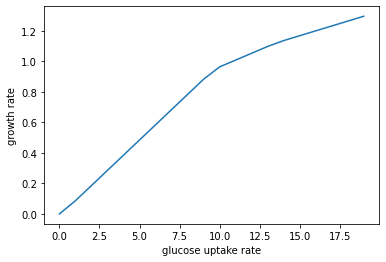

In [96]:
import matplotlib.pyplot as plt
plt.plot([0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19],growthRates)
plt.xlabel("glucose uptake rate")
plt.ylabel("growth rate")
plt.show()

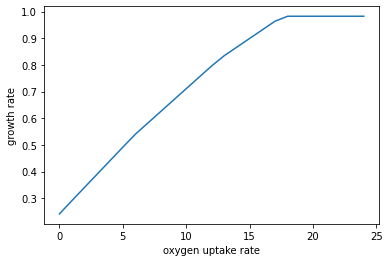

In [98]:
from cobra.test import create_test_model
new_model=create_test_model("ecoli")
new_model.reactions.EX_glc__D_e.lower_bound = -10
growthRates = []
for i in range(0,25):
    new_model.reactions.EX_o2_e.bounds = -i,-i
    growthRates.append(new_model.optimize().objective_value)
import matplotlib.pyplot as plt
plt.plot([0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24],growthRates)
plt.xlabel("oxygen uptake rate")
plt.ylabel("growth rate")
plt.show()

# Phenotypic Phase Planes

In [101]:
from cobra.test import create_test_model
new_model=create_test_model("ecoli")
w, h = 20, 20;
growthRates = [[0 for x in range(w)] for y in range(h)] 
for i in range(0,20):
    for j in range(0,20):
        new_model.reactions.EX_glc__D_e.bounds = -i,-i
        new_model.reactions.EX_o2_e.bounds = -j,-j
        growthRates[i][j] = new_model.optimize().objective_value

In [102]:
print(growthRates)

[[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0], [0.0, 0.040940192858216394, 0.07791231229785656, 0.08647858262764228, 0.08647858262764027, 0.08647858262764072, 0.08647858262764131, 0.08647858262764212, 0.08647858262763733, 0.0864785826276386, 0.08647858262764443, 0.08647858262765104, 0.08647858262764604, 0.08647858262764126, 0.0864785826276471, 0.08647858262764269, 0.08647858262764836, 0.08647858262764231, 0.08647858262763743, 0.0864785826276441], [0.020447500257655887, 0.07037906853942595, 0.11537690714587898, 0.15483211106325684, 0.18602227486090372, 0.18602227486090298, 0.1860222748609025, 0.18602227486090406, 0.1860222748609036, 0.18602227486090328, 0.18602227486090184, 0.18602227486090225, 0.1860222748609041, 0.1860222748609042, 0.18602227486090547, 0.1860222748609052, 0.18602227486090483, 0.1860222748609022, 0.18602227486090464, 0.18602227486090142], [0.04807925736259531, 0.09808736323959476, 0.14727835612551954, 0.1898136214

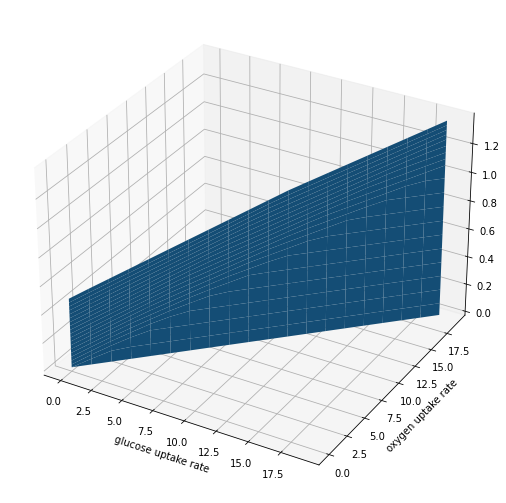

In [106]:
from mpl_toolkits import mplot3d
import numpy as np
import matplotlib.pyplot as plt
# Creating figyre
fig = plt.figure(figsize =(14, 9))
ax = plt.axes(projection ='3d')
x = [0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19]
y = [0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19]

# Creating plot
ax.plot_surface(np.array(x), np.array(y), np.array(growthRates))
plt.xlabel("glucose uptake rate") 
plt.ylabel("oxygen uptake rate")
#plt.zlabel("growth rate") 
# show plot
plt.show()